In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [12]:
df = pd.read_csv("train.csv", encoding='latin-1')

df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [13]:
print(df.shape)

(20050, 26)


In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

***Атрибуты, которые не представляют полезной информации для определения пола:***\
-_unit_id: уникальный id пользователя\
-_last_judgment_at: дата и время последнего заключения участника; пустое поле - для золотой модели\
-user_timezone: часовой пояс пользователя\
-tweet_coord: если у пользователя включено определение местоположения, координаты будут представлены в виде строки в формате "[latitude, longitude]"\
-tweet_count: количество твитов-постов, опубликованных пользователем\
-tweet_created: когда был создан случайный твит-пост (в текстовом столбце)\
-tweet_id: id твита-поста для случайного твита-поста\
-tweet_location: местоположение твита-поста\
-profileimage: ссылка на изображение профиля\
-created: дата и время, когад профиль был создан\

***Атрибуты, которые нужны для определения пола:***\
-_golden: был ли пользователь включен в золотой стандарт для данной модели; ДА/НЕТ\
-_unit_state: состояние наблюдения, одно из двух: завершенное (по оценке авторов) или "золотое" (для наблюдений по золотому стандарту).\
-_trusted_judgments: количество достоверных оценок; всегда 3 для наблюдений, не относящихся к золотому стандарту, и что может быть уникальным id для наблюдений, относящихся к золотому стандарту\
-gender: мужчина, женщина или бренд (для профилей, не относящихся к людям)\
-gender:confidence: показатель, отражающий доверие к представленному полу\
-gender_gold: если профиль золотой, то какого вы пола\
-profile_yn: "нет" здесь, по-видимому, означает, что профиль должен был стать частью набора данных, но не был доступен, когда авторы пришли оценивать его\
-profile_yn:confidence: уверенность в существовании/несуществовании профиля\
-profile_yn_gold: является ли значение профиля золотистым\
-description: описание профиля пользователя\
-fav_number: количество твитов, которые пользователь добавил в избранное\
-link_color: цвет ссылки в профиле в виде шестнадцатеричного значения\
-name: имя пользователя\
-retweet_count: количество раз, когда пользователь делал репост(или, возможно, был репостнут)\
-sidebar_color: цвет боковой панели профиля в виде шестнадцатеричного значения\
-text: текст одного из случайных твитов пользователя

In [15]:
print(df.isna().sum())

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7485
user_timezone             7798
dtype: int64


In [16]:
df.drop (columns = ['_unit_id',
                      '_last_judgment_at',
                      'user_timezone',
                      'tweet_coord',
                      'tweet_count',
                      'tweet_created',
                      'tweet_id',
                      'tweet_location',
                      'profileimage',
                      'created'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _golden                20050 non-null  bool   
 1   _unit_state            20050 non-null  object 
 2   _trusted_judgments     20050 non-null  int64  
 3   gender                 19953 non-null  object 
 4   gender:confidence      20024 non-null  float64
 5   profile_yn             20050 non-null  object 
 6   profile_yn:confidence  20050 non-null  float64
 7   description            16306 non-null  object 
 8   fav_number             20050 non-null  int64  
 9   gender_gold            50 non-null     object 
 10  link_color             20050 non-null  object 
 11  name                   20050 non-null  object 
 12  profile_yn_gold        50 non-null     object 
 13  retweet_count          20050 non-null  int64  
 14  sidebar_color          20050 non-null  object 
 15  te

In [17]:
df.isna().sum()

,0
_golden,0
_unit_state,0
_trusted_judgments,0
gender,97
gender:confidence,26
profile_yn,0
profile_yn:confidence,0
description,3744
fav_number,0
gender_gold,20000


In [18]:
df['gender'].unique()

array(['male', 'female', 'brand', 'unknown', nan], dtype=object)

In [19]:
df['gender'].fillna('unknown', inplace=True)

df.isna().sum()

<ipython-input-19-aa36202476ac>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].fillna('unknown', inplace=True)


,0
_golden,0
_unit_state,0
_trusted_judgments,0
gender,0
gender:confidence,26
profile_yn,0
profile_yn:confidence,0
description,3744
fav_number,0
gender_gold,20000


In [20]:
df['gender'].unique()

array(['male', 'female', 'brand', 'unknown'], dtype=object)

In [21]:
drop_items_idx = df[df['gender'] == 'unknown'].index

df.drop (index = drop_items_idx, inplace = True)

df['gender'].value_counts()

,count
gender,
female,6700
male,6194
brand,5942


In [22]:
d = {'female': 0, 'male': 1, 'brand': 2, 'unknown': 3}
df['gender'] = df['gender'].map(d)

df.head()

,_golden,_unit_state,_trusted_judgments,gender,gender:confidence,profile_yn,profile_yn:confidence,description,fav_number,gender_gold,link_color,name,profile_yn_gold,retweet_count,sidebar_color,text
0,False,finalized,3,1,1.0000,yes,1.0,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,0,FFFFFF,Robbie E Responds To Critics After Win Against...
1,False,finalized,3,1,1.0000,yes,1.0,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,NaN,0,C0DEED,ÛÏIt felt like they were my friends and I was...
2,False,finalized,3,1,0.6625,yes,1.0,louis whining and squealing and all,7696,NaN,ABB8C2,lwtprettylaugh,NaN,1,C0DEED,i absolutely adore when louis starts the songs...
3,False,finalized,3,1,1.0000,yes,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,NaN,0084B4,douggarland,NaN,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...
4,False,finalized,3,0,1.0000,yes,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,NaN,3B94D9,WilfordGemma,NaN,0,0,Watching Neighbours on Sky+ catching up with t...


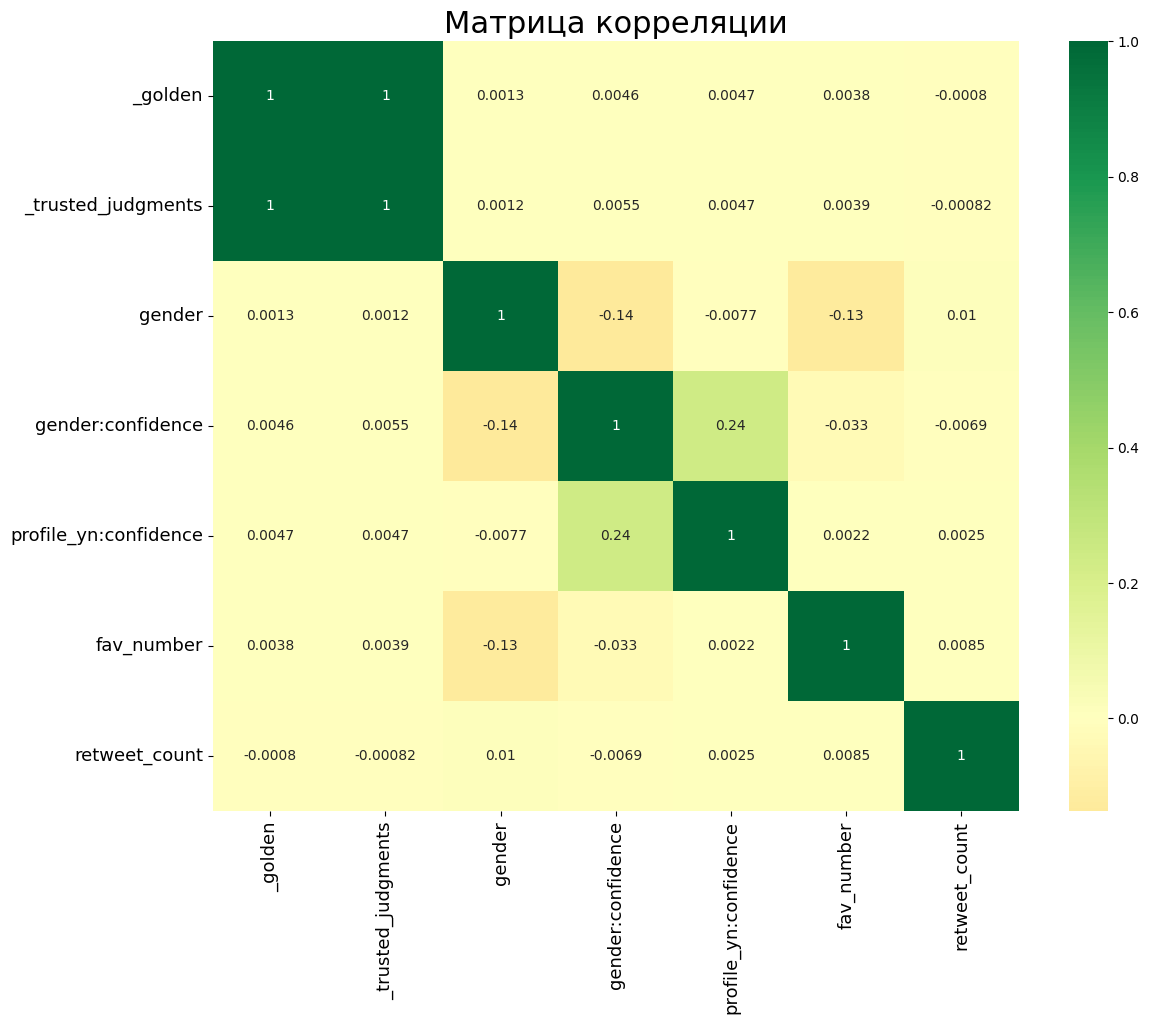

In [23]:
df.corr(numeric_only=True)
plt.figure(figsize=(13,10))

corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, xticklabels=df.corr(numeric_only=True).columns, yticklabels=df.corr(numeric_only=True).columns, cmap="RdYlGn", center=0, annot=True)
plt.title('Матрица корреляции', fontsize=22)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

In [24]:
drop_items_idx = df[df['profile_yn'] == 'no'].index

df.drop (index = drop_items_idx, inplace = True)

print (df['profile_yn'].value_counts())

df.drop (columns = ['profile_yn','profile_yn:confidence','profile_yn_gold'], inplace = True)

profile_yn
yes    18836
Name: count, dtype: int64


In [25]:
drop_items_idx = df[df['gender:confidence'] < 1].index

df.drop (index = drop_items_idx, inplace = True)

print (df['gender:confidence'].value_counts())

df.drop (columns = ['gender:confidence'], inplace = True)

gender:confidence
1.0    13804
Name: count, dtype: int64


In [26]:
df.drop (columns = ['_golden','_unit_state','_trusted_judgments','gender_gold'], inplace = True)

print (df['gender'].value_counts())

print ('---------------------------')
df.info()

gender
0    5367
1    4653
2    3784
Name: count, dtype: int64
---------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 13804 entries, 0 to 20049
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         13804 non-null  int64 
 1   description    11773 non-null  object
 2   fav_number     13804 non-null  int64 
 3   link_color     13804 non-null  object
 4   name           13804 non-null  object
 5   retweet_count  13804 non-null  int64 
 6   sidebar_color  13804 non-null  object
 7   text           13804 non-null  object
dtypes: int64(3), object(5)
memory usage: 970.6+ KB


In [27]:
df.isna().sum()

,0
gender,0
description,2031
fav_number,0
link_color,0
name,0
retweet_count,0
sidebar_color,0
text,0


Следующим шагом было бы идеально убрать лишние данные в описании профиля, однако, я не знаю, как это пока что сделать, поэтому удалю этот столбец тоже.

In [28]:
df = df.drop(['description'], axis=1)

print (df['gender'].value_counts())

print ('---------------------------')
df.info()

gender
0    5367
1    4653
2    3784
Name: count, dtype: int64
---------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 13804 entries, 0 to 20049
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         13804 non-null  int64 
 1   fav_number     13804 non-null  int64 
 2   link_color     13804 non-null  object
 3   name           13804 non-null  object
 4   retweet_count  13804 non-null  int64 
 5   sidebar_color  13804 non-null  object
 6   text           13804 non-null  object
dtypes: int64(3), object(4)
memory usage: 862.8+ KB


In [29]:
df.isna().sum()

,0
gender,0
fav_number,0
link_color,0
name,0
retweet_count,0
sidebar_color,0
text,0


In [30]:
df.head()

,gender,fav_number,link_color,name,retweet_count,sidebar_color,text
0,1,0,08C2C2,sheezy0,0,FFFFFF,Robbie E Responds To Critics After Win Against...
1,1,68,0084B4,DavdBurnett,0,C0DEED,ÛÏIt felt like they were my friends and I was...
3,1,202,0084B4,douggarland,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...
4,0,37318,3B94D9,WilfordGemma,0,0,Watching Neighbours on Sky+ catching up with t...
5,0,3901,F5ABB5,monroevicious,0,0,"Ive seen people on the train with lamps, chair..."


In [31]:
%%time
from sklearn.model_selection import train_test_split

X = df[['fav_number','retweet_count']]
y = df['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)
answers_pred = model.predict(X_test)

CPU times: user 156 ms, sys: 2.61 ms, total: 159 ms
Wall time: 179 ms


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
model.coef_

array([[ 3.47120008e-05, -2.39619736e-01],
       [ 2.66840047e-05,  4.38525160e-02],
       [-6.13960061e-05,  1.95767220e-01]])

In [33]:
model.intercept_

array([ 0.06462273, -0.04036456, -0.02425817])

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, answers_pred))

0.401979719942057
